In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import scipy as sc
from os import listdir

In [19]:
def calc_fft(signal):
    fft_fs = 10000
    fft_Ts = 1/fft_fs

    fft = np.fft.fft(signal, norm = "ortho")
    fft = fft[range(int(len(signal)/2))]

    tpCount = len(signal)
    values = np.arange(int(tpCount/2))
    timePeriod = tpCount/fft_fs
    freq = values/timePeriod
    fft_df = pd.DataFrame(abs(fft), columns = ["a"])
    y = fft_df.a.rolling(5).mean()
    return y, freq

In [20]:
def find_left_components(signal, fbqnmin, fbqnmax):
    var = 0
    store_freq_n = [0]
    store_value_n = [0]
    f_passado = round(fbqnmin,1)
    count = 0
    f_atual = round(fbqnmin,1)
    while(f_atual >= fbqnmax):
        f_atual = f_passado - 0.1
        test = signal[int(f_atual*10)] - signal[int(f_passado*10)]
        if(test > 0):
            count = count + 1
        else:
            if(var):
                store_freq_n.append(f_passado)
                store_value_n.append(signal[int(f_passado*10)])
                var = 0
            count = 0
        if(count == 3):
            var = 1
        f_passado = f_atual
    return store_freq_n, store_value_n

In [21]:
def find_right_components(signal, fbqpmin, fbqpmax):
    var = 0
    store_freq_p = [0]
    store_value_p = [0]
    f_passado = round(fbqpmin,1)
    count = 0
    f_atual = round(fbqpmin,1)
    while(f_atual <= fbqpmax):
        f_atual = f_passado + 0.1
        test = signal[int(f_atual*10)] - signal[int(f_passado*10)]
        if(test > 0):
            count = count + 1
        else:
            if(var):
                store_freq_p.append(f_passado)
                store_value_p.append(signal[int(f_passado*10)])
                var = 0
            count = 0
        if(count == 3):
            var = 1
        f_passado = f_atual
    return store_freq_p, store_value_p

In [22]:
path = r"C:\Repositorios\Simulacao_MIT\Classificador\MLP\dataset\csv_files\Normal"
os.chdir(path)
df_total = pd.DataFrame(columns = ['Failure','Type', 'L_freq', 'R_freq'])
columms = ["a", "b", "c"]
j = 0
tipo = 0
failure = 0

for file in os.listdir():
    tipo = tipo+1
    df = pd.read_csv(file, usecols = ["a", "b", "c"])
    signal  = df.a[0:100000]

    fft, freq = calc_fft(signal)

    #Achar a frequencia fundamental 
    max_index = np.where(abs(fft) == np.amax(abs(fft[100:])))
    com_freq = freq[max_index]
    # print("Frequencia de operação: ", com_freq)

    #Verificar a faixa de busca pela componente 
    s = 0.67 / 100
    s2 = 10.55 / 100
    fbqnmin = (1 - 2*1*s)*com_freq[0]
    fbqnmax = (1 - 2*1*s2)*com_freq[0]
    fbqpmin = (1 + 2*1*s)*com_freq[0]
    fbqpmax = (1 + 2*1*s2)*com_freq[0]
    # print("Freq mínima: ", fbqnmin)
    # print("Freq máxima: ", fbqnmax)

    #Encontrar as componentes de frequencia e seus valores de amplitude
    left_freq, left_values = find_left_components(fft, fbqnmin, fbqnmax)

    right_freq, right_values = find_right_components(fft, fbqpmin, fbqpmax)

    df_total = df_total.append({'Failure' : failure, 'Type' : tipo, 'L_freq' : max(left_values), 'R_freq' : max(right_values)}, ignore_index=True)

    signal  = df.b[0:100000]

    fft, freq = calc_fft(signal)

    #Achar a frequencia fundamental 
    max_index = np.where(abs(fft) == np.amax(abs(fft[100:])))
    com_freq = freq[max_index]
    # print("Frequencia de operação: ", com_freq)

    #Verificar a faixa de busca pela componente 
    s = 0.67 / 100
    s2 = 10.55 / 100
    fbqnmin = (1 - 2*1*s)*com_freq[0]
    fbqnmax = (1 - 2*1*s2)*com_freq[0]
    fbqpmin = (1 + 2*1*s)*com_freq[0]
    fbqpmax = (1 + 2*1*s2)*com_freq[0]
    # print("Freq mínima: ", fbqnmin)
    # print("Freq máxima: ", fbqnmax)

    #Encontrar as componentes de frequencia e seus valores de amplitude
    left_freq, left_values = find_left_components(fft, fbqnmin, fbqnmax)

    right_freq, right_values = find_right_components(fft, fbqpmin, fbqpmax)

    df_total = df_total.append({'Failure' : failure, 'Type' : tipo, 'L_freq' : max(left_values), 'R_freq' : max(right_values)}, ignore_index=True)

    signal  = df.c[0:100000]

    fft, freq = calc_fft(signal)

    #Achar a frequencia fundamental 
    max_index = np.where(abs(fft) == np.amax(abs(fft[100:])))
    com_freq = freq[max_index]
    # print("Frequencia de operação: ", com_freq)

    #Verificar a faixa de busca pela componente 
    s = 0.67 / 100
    s2 = 10.55 / 100
    fbqnmin = (1 - 2*1*s)*com_freq[0]
    fbqnmax = (1 - 2*1*s2)*com_freq[0]
    fbqpmin = (1 + 2*1*s)*com_freq[0]
    fbqpmax = (1 + 2*1*s2)*com_freq[0]
    # print("Freq mínima: ", fbqnmin)
    # print("Freq máxima: ", fbqnmax)

    #Encontrar as componentes de frequencia e seus valores de amplitude
    left_freq, left_values = find_left_components(fft, fbqnmin, fbqnmax)

    right_freq, right_values = find_right_components(fft, fbqpmin, fbqpmax)

    df_total = df_total.append({'Failure' : failure, 'Type' : tipo, 'L_freq' : max(left_values), 'R_freq' : max(right_values)}, ignore_index=True)



    

    

    


C:\Users\joao_brasil\AppData\Local\Temp\ipykernel_9348\2601594777.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append({'Failure' : failure, 'Type' : tipo, 'L_freq' : max(left_values), 'R_freq' : max(right_values)}, ignore_index=True)
C:\Users\joao_brasil\AppData\Local\Temp\ipykernel_9348\2601594777.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append({'Failure' : failure, 'Type' : tipo, 'L_freq' : max(left_values), 'R_freq' : max(right_values)}, ignore_index=True)
C:\Users\joao_brasil\AppData\Local\Temp\ipykernel_9348\2601594777.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append({'Failure' : failure, 'Type' : tipo, 'L_freq' : max(left_values

In [23]:
# file = r"C:\Repositorios\Simulacao_MIT\Classificador\MLP\dataset\csv_files\Falha_1B_csv\b000c30c050b1.csv"
# df = pd.read_csv(file, usecols = ["a", "b", "c"])
# signal  = df.a[0:100000]

# fft, freq = calc_fft(signal)

# #Achar a frequencia fundamental 
# max_index = np.where(abs(fft) == np.amax(abs(fft[100:])))
# com_freq = freq[max_index]
# print("Frequencia de operação: ", com_freq)

# #Verificar a faixa de busca pela componente 
# s = 0.67 / 100
# s2 = 10.55 / 100
# fbqnmin = (1 - 2*1*s)*com_freq[0]
# fbqnmax = (1 - 2*1*s2)*com_freq[0]
# fbqpmin = (1 + 2*1*s)*com_freq[0]
# fbqpmax = (1 + 2*1*s2)*com_freq[0]
# print("Freq mínima: ", fbqnmin)
# print("Freq máxima: ", fbqnmax)
# print("Freq mínima: ", fbqpmin)
# print("Freq máxima: ", fbqpmax)

# #Encontrar as componentes de frequencia e seus valores de amplitude
# left_freq, left_values = find_left_components(fft, fbqnmin, fbqnmax)

# right_freq, right_values = find_right_components(fft, fbqpmin, fbqpmax)

# # df_total = df_total.append({'Type' : 1, 'L_freq' : max(left_values), 'R_freq' : max(right_values)}, ignore_index=True)
# print(max(left_values))
# print(max(right_values))



In [24]:
left_values

[0, 1.0486811056825445]

In [25]:
max(right_values)

0

In [26]:
df_total

,Failure,Type,L_freq,R_freq
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,2,0,0
4,0,2,0,0
...,...,...,...,...
58,0.0,20.0,0.603626,0.699317
59,0.0,20.0,0.607677,0.576581
60,0.0,21.0,1.129452,1.125842
61,0.0,21.0,1.072265,1.061493


In [27]:
df_total.to_csv('Normal_componentes.csv')
df_total.to_excel('Normal_componentes.xlsx')

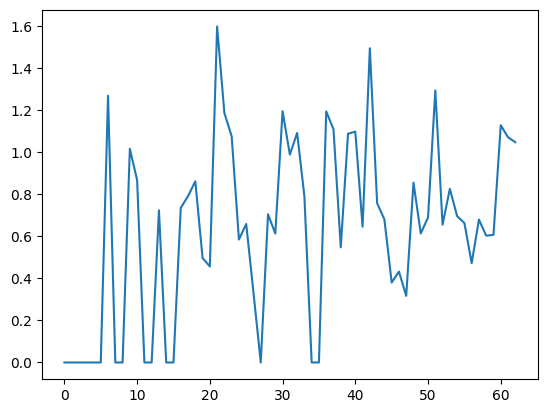

In [28]:
plt.plot(df_total.L_freq)

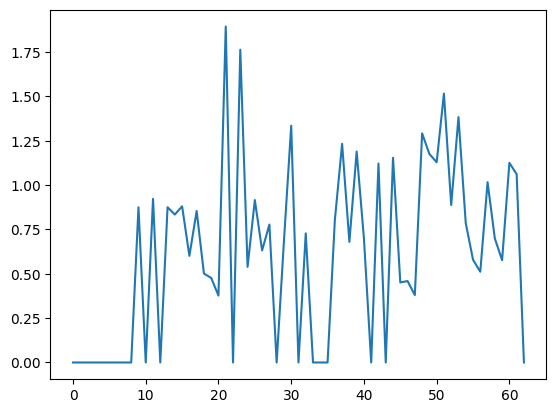

In [29]:
plt.plot(df_total.R_freq)